In [1]:
%matplotlib inline

### Camera calibration

Camera calibration is accomplished by loading the chessboard images at `images/calibration` and running their grayscaled versions through `cv2.findChessboardCorners`. Corners (`imgpoints`) and chessboard coordinates (`objpoints`) for each image are calculated and saved to a pickle file.

The camera is calibrated by passing the `imgpoints` and `objpoints` to `cv2.calibrateCamera` which returns the distortion coefficiants necessary to undistort an image. Finally, `cv2.undistort` can now be used to undistort any image taken with this camera.

In [32]:
# %load calibrate.py
from image_helper import rgb_image, rgb_to_gray
import cv2
import glob
import numpy as np
import pickle

# List of images to be used for calibration
images_glob = glob.glob("images/calibration/calibration*.jpg")

# Shape of the calibration images
image_shape = rgb_image(images_glob[0]).shape[1::-1]

# Number of columns and rows for the chessboard
chessboard_shape = (9, 6)

# Where to save the calibration data
output_file = "./calibration.pkl"

objpoints = []
imgpoints = []

for filepath in images_glob:
    # Load image
    img = rgb_image(filepath)

    # Convert image to grayscale
    gray = rgb_to_gray(img)

    # Find chessboard corners for image
    pattern_was_found, corners = cv2.findChessboardCorners(gray, chessboard_shape, None)

    # Create an object points array
    cols, rows = chessboard_shape
    objp = np.zeros((cols * rows, 3), np.float32)
    objp[:,:2] = np.mgrid[0:cols, 0:rows].T.reshape(-1, 2)

    if pattern_was_found:
        objpoints.append(objp)
        imgpoints.append(corners)


# Use the object points and image points to calibrate a camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_shape, None, None)

# Save the calibration data for use later
with open(output_file, "wb") as f:
    data = {}
    data["ret"] = ret
    data["mtx"] = mtx
    data["dist"] = dist
    data["rvecs"] = rvecs
    data["tvecs"] = tvecs
    pickle.dump(data, f)


#### Undistorting an image

Below is a side-by-side of an undistorted image and its original.

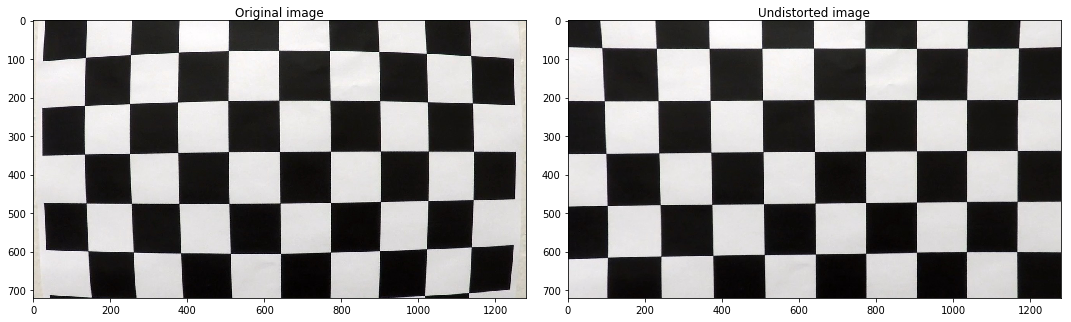

In [56]:
import cv2
import matplotlib.pyplot as plt

img = rgb_image("images/calibration/calibration01.jpg")
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
f.tight_layout()

ax1.set_title("Original image")
ax1.imshow(img)

ax2.set_title("Undistorted image")
ax2.imshow(dst);

plt.show();